# Mieux comprendre la maladie rénale chronique

#### Contexte : 
En France, 3 millions de personnes souffrent d'une maladie rénale chronique selon le rapport "Ma maladie chronique 2022". Cette maladie correspond à une diminution du fonctionnement des reins qui ne filtrent plus correctement le sang dans l'organisme. Les causes majeurs sont le diabète et l'hypertension artérielle. La diagnostiquer pour la traiter au plus tôt représente donc un enjeu sanitaire. 

#### Objectifs principaux  :
Contruistre un algorithme capable de diagnostiquer la maladie rénale chronique suite à un bilan sanguin et urinaire.

Cela apportera au corps médical :
* une aide à la détection de la maladie
* une plus fine compréhension de celle-ci


#### Le dataset :
Nous utiliserons les bilans médicaux de 400 patients collectés par un hopital en 2015. Ces données sont disponibles publiquement sur le site UCI Machine Learning Repository. 

Les variables à notre disposition sont les suivantes :
- age 
- bp / blood pressure / pression saguine
- sg / specific gravity / densité urinaire
- al / albumin / albumine
- su / sugar / sucre
- rbc / red blood cells / globules rouges
- pc / pus cell / cellule de pus
- pcc / pus cell clumps / amas de cellules de pus
- ba / bacteria / bactérie
- bgr / blood glucose random / glycémie aléatoire
- bu / blood urea / uréee sanguine
- sc / serum creatinine / créatine sérique
- sod / sodium 
- pot / potassium 
- hemo / hemoglobin / hémoglobine
- pcv / packed cell volume / volume d'hématocytes
- wc / white blood cell count / nombre de globules blancs
- rc / red blood cell count / nombre de globules rouges
- htn / hypertension
- dm /diabetes mellitus / diabète sucrée
- cad / coronary artery disease / maladie coronarienne
- appet / appetite / appétit
- pe / pedal edema / oedme de la pédale
- ane / anemia / anémie
- class / class / classe

### Première exploration du dataset

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Lecture fichier
data = pd.read_csv('kidney_disease.csv', index_col ='id')

#Affichage des premières lignes
display(data.head())

#Nombre de valeurs manquantes par colonne
data.isna().sum()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [3]:
#Nettoyage et encodage de la variable cible

data['classification'].replace({'ckd' : 'yes', 'ckd\t' : 'yes', 'notckd' : 'no' }, inplace = True)


In [4]:
#Renommage de la varibale cible 
dico = {'classification' : 'ill'}

data = data.rename(dico, axis = 1)

data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,ill
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,yes


In [5]:
#Affichage description
display(data.describe())

#Affichage infos
print(data.info())

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wc      295 non-null    object 
 17  rc      270 non-null    object 
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [6]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in cat_cols:
    print(f"{col} : {data[col].unique()} values\n")

rbc : [nan 'normal' 'abnormal'] values

pc : ['normal' 'abnormal' nan] values

pcc : ['notpresent' 'present' nan] values

ba : ['notpresent' 'present' nan] values

pcv : ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values

wc : ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '

- Certaines variables numériques sont catégorisées en object notamment par l'insertion de ce qui pourrait ressembler à une erreur de frappe par l'ajout d'une tabulation " \t ". Nous retirerons par la suite ces symboles puis transformerons ces variables en numériques.
- Des valeurs manquantes sont présentes. Le dataset étant relativement peu volumineux, nous essayerons de conserver les observations au maximum en remplacant les valeurs manquantes par la moyenne ou le mode le cas échéant.

### Data Cleaning

In [7]:
#Nettoyage des variables avec faute de frappe ou d'import

data['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
data['cad'].replace(to_replace ={'\tno':'no'},inplace=True)
data['rc'].replace(to_replace ={'\t?': 5.2},inplace=True)
data['wc'].replace(to_replace ={'\t8400': 8400, '\t6200' : 6200, '\t?' : 6000},inplace=True)
data['pcv'].replace(to_replace ={'\t43': 43, '\t6200' : 6200, '\t?' : 40},inplace=True)


In [8]:
#Correction des types de données erronés
data['age'] = data['age'].astype(float)
data['rc'] = data['rc'].astype(float)
data['wc'] = data['wc'].astype(float)
data['pcv'] = data['pcv'].astype(float)

In [9]:
#Affichage description
display(data.describe())

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,330.000000,295.000000,270.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.887879,8397.966102,4.709259
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.976642,2942.798647,1.023855
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.925000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [10]:
# Vérificaion des variables
for col in data:
    print(f"{col} : {data[col].unique()} \n")

age : [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 

bp : [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 

sg : [1.02  1.01  1.005 1.015   nan 1.025] 

al : [ 1.  4.  2.  3.  0. nan  5.] 

su : [ 0.  3.  4.  1. nan  2.  5.] 

rbc : [nan 'normal' 'abnormal'] 

pc : ['normal' 'abnormal' nan] 

pcc : ['notpresent' 'present' nan] 

ba : ['notpresent' 'present' nan] 

bgr : [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94.

In [11]:
#identifier variables catégorielles stockées dans une liste
cat_data = [col for col in data.columns if data[col].dtype == 'object']
num_df = [col for col in data.columns if data[col].dtype != 'object']

print(cat_data)
print(num_df)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'ill']
['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [12]:
#Remplacement des valeurs manquantes numériques par la moyenne
data[num_df] = data[num_df].fillna(data[num_df].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [13]:
for col in data[cat_data] :
    display(data[col].value_counts())

normal      201
abnormal     47
Name: rbc, dtype: int64

normal      259
abnormal     76
Name: pc, dtype: int64

notpresent    354
present        42
Name: pcc, dtype: int64

notpresent    374
present        22
Name: ba, dtype: int64

no     251
yes    147
Name: htn, dtype: int64

no     261
yes    137
Name: dm, dtype: int64

no     364
yes     34
Name: cad, dtype: int64

good    317
poor     82
Name: appet, dtype: int64

no     323
yes     76
Name: pe, dtype: int64

no     339
yes     60
Name: ane, dtype: int64

yes    250
no     150
Name: ill, dtype: int64

In [14]:
#Replacement des variables catégorielles par le mode
for col in data[cat_data] :
    data[col] = data[col].fillna(data[col].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  pe

### Data visualisation et statistiques

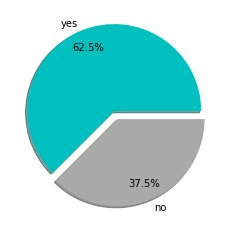

In [15]:
# Répartition de la valeur cible "ill"

plt.pie(x= data['ill'].value_counts(),
        labels= ['yes', 'no'],
        explode =[ 0.05, 0.05], 
        colors = ['c', 'darkgray'],
        labeldistance = 1.1, 
        autopct = lambda x : str(np.round(x,1)) + '%',
        pctdistance = 0.8,
        shadow = True);

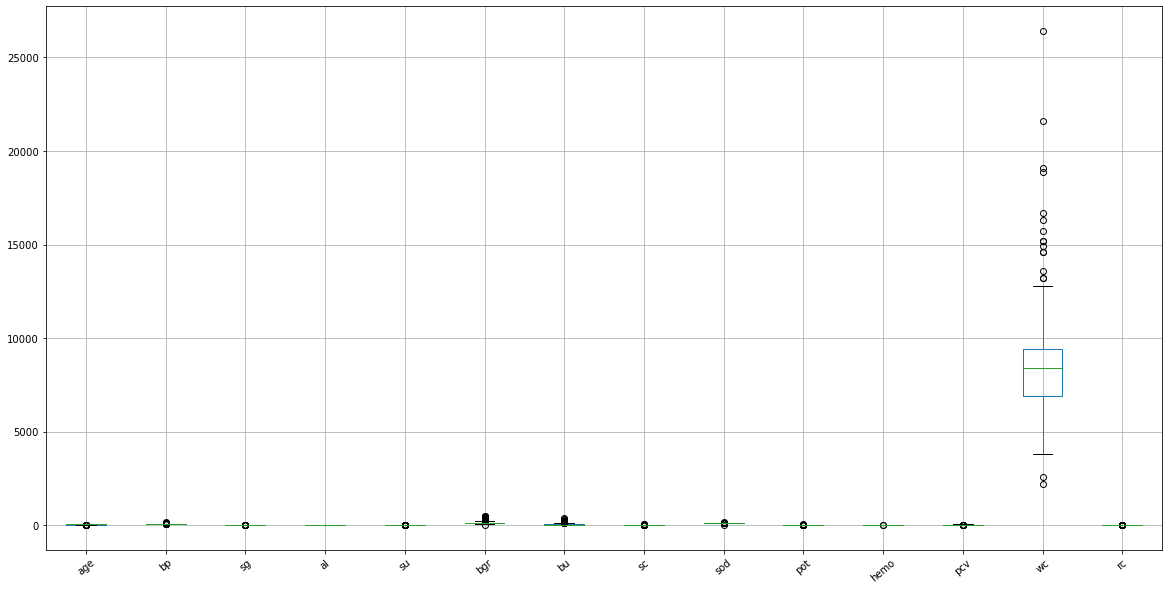

In [16]:
#Boîte à moustaches des valeurs numériques
plt.figure(figsize=(20,10))
data.boxplot()
plt.xticks(rotation =40);

La variable wc prend des valeurs plus élevées et étalées par rapport aux autres variables.

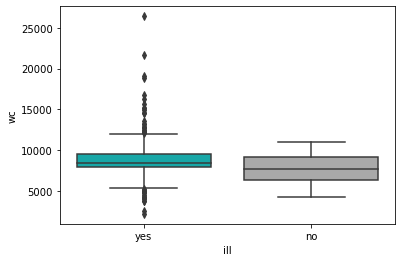

In [17]:
#Boxplot de wc en fonction de ill
color = {'yes': 'c', 'no':'darkgray'}
sns.boxplot(x='ill', y='wc', palette = color, data = data);

On peut remarquer que c'est les patients malades qui concentrent les valeurs extrêmes. 

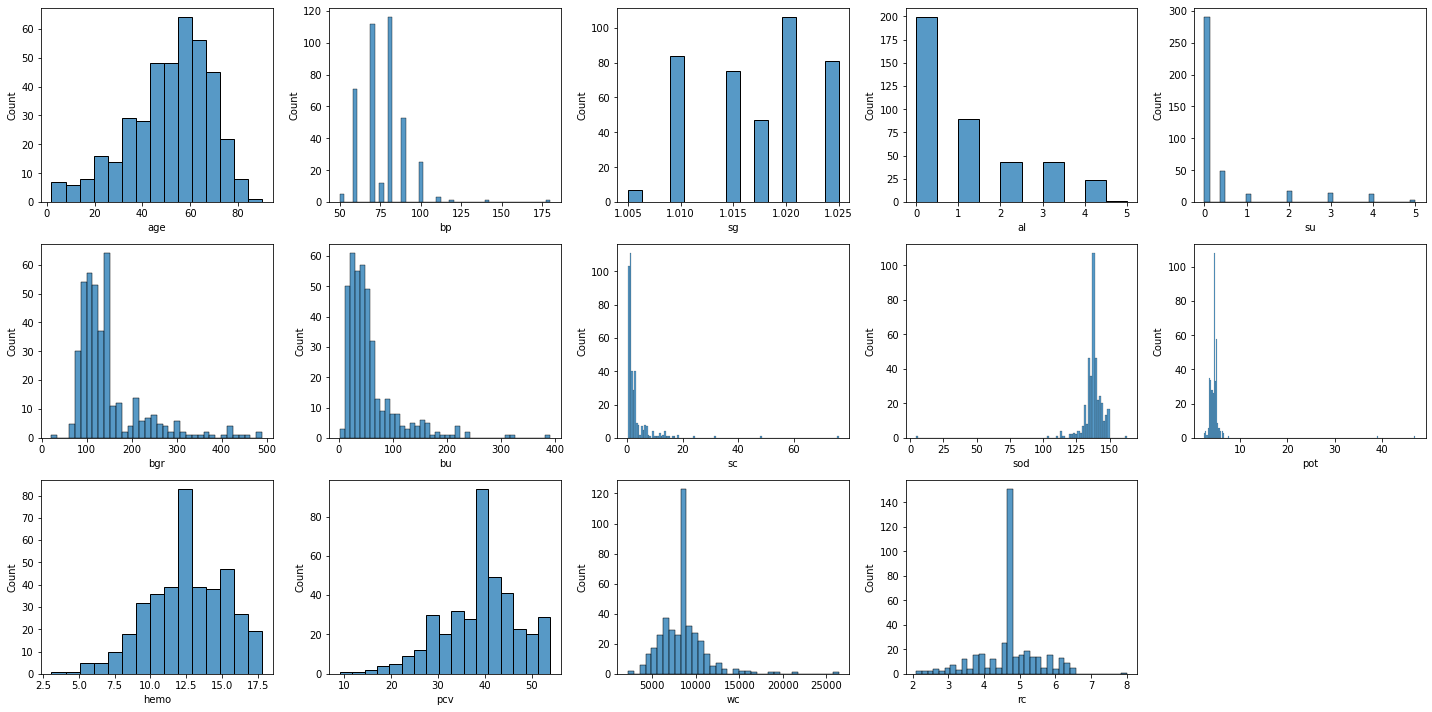

In [18]:
#Répartition des valeurs numériques du dataset
plt.figure(figsize = (20,10))
plot_number = 1

for column in num_df:
    ax = plt.subplot(3, 5, plot_number)
    sns.histplot(data[column])
    plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

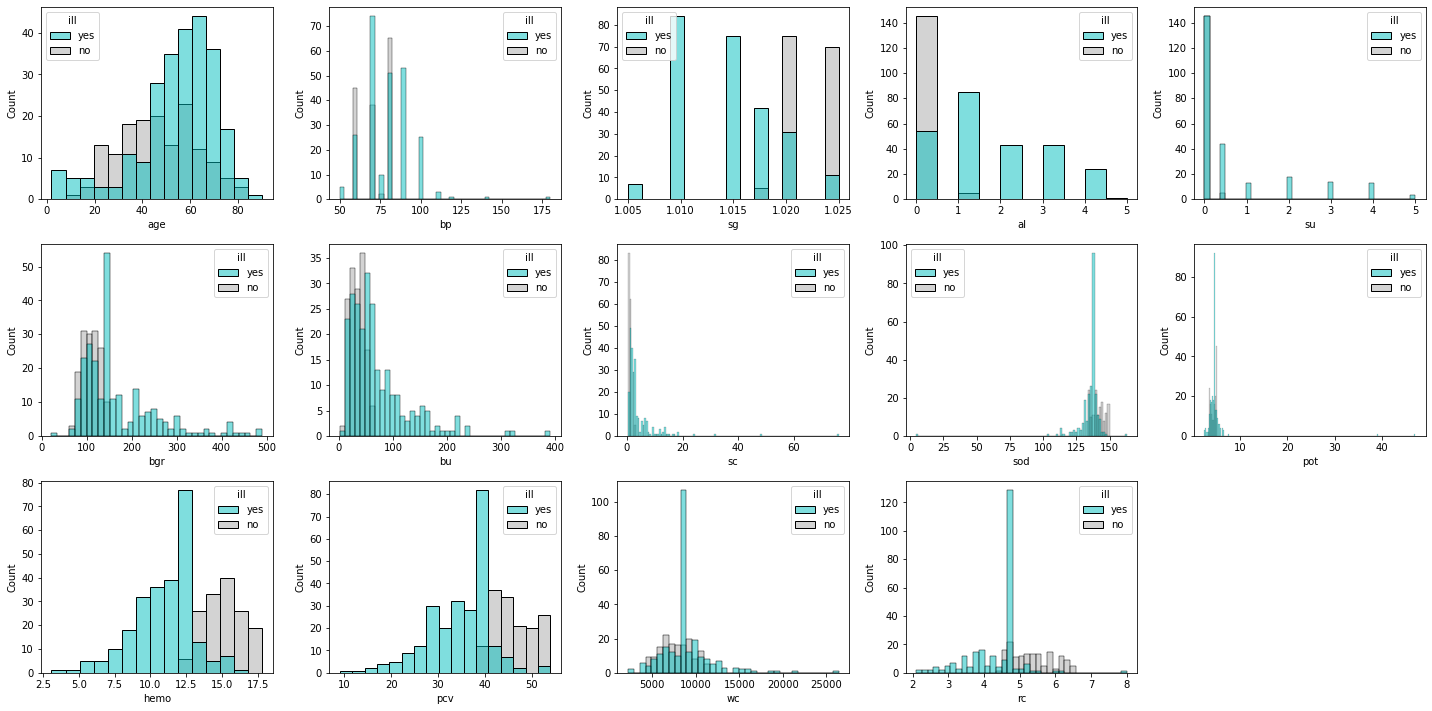

In [19]:
#Répartition des valeurs numériques du dataset en fonction de la variables cible "ill"
plt.figure(figsize = (20,10))
plot_number = 1

for column in num_df:
    ax = plt.subplot(3, 5, plot_number)
    color = {'yes': 'c', 'no':'darkgray'}
    sns.histplot(x=column, hue='ill', palette = color, data = data)
    plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

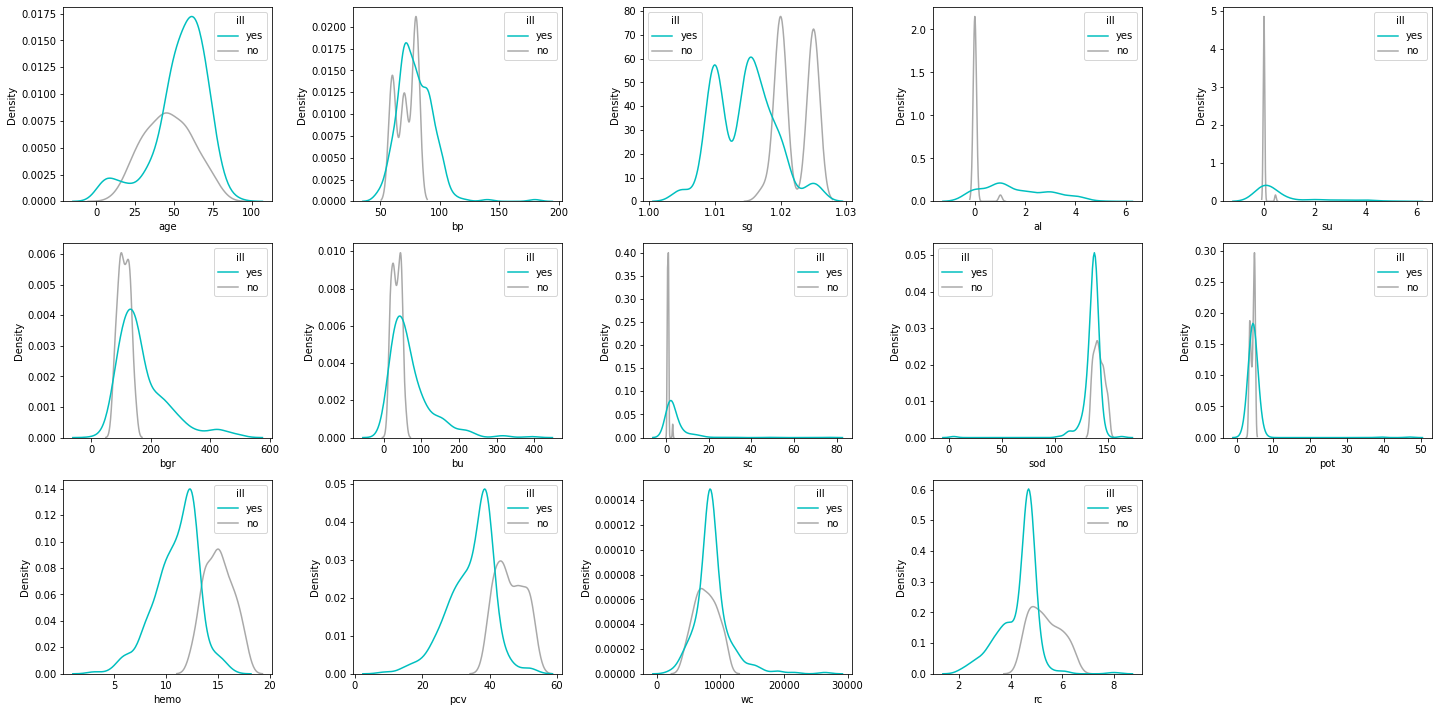

In [20]:
#Courbe de densité des valeurs numériques du dataset en fonction de la variables cible "ill"
plt.figure(figsize = (20,10))
plot_number = 1

for column in num_df:
    ax = plt.subplot(3, 5, plot_number)
    color = {'yes': 'c', 'no':'darkgray'}
    sns.kdeplot(x=column, hue='ill', palette = color, data = data)
    plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

In [21]:
#Test Anova pour détecter quelles variables influent sur la probabilité que le patient soit atteint de la maladie
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = []

for col in num_df:
    result = smf.ols(f'{col} ~ ill', data=data).fit()
    table = sm.stats.anova_lm(result)
    F = table.iloc[0, 3]  # The F-statistic 
    p_value = table.iloc[0, 4]  # The p-value
    results.append((col, F, p_value))

df_anova = pd.DataFrame(results, columns=['col', 'F', 'p_value'])
df_anova

,col,F,p_value
0,age,21.303809,5.295663e-06
1,bp,36.710600,3.178695e-09
2,sg,380.166757,6.447850e-60
3,al,222.988622,2.372989e-40
4,su,47.918793,1.787882e-11
5,bgr,76.431197,6.470715e-17
6,bu,63.935817,1.411285e-14
7,sc,37.678634,2.018869e-09
8,sod,52.818300,1.949532e-12
9,pot,2.368948,1.245651e-01


Toutes les variables numériques semblent influer sur la probabilité que le patient ait ou non une maladie chronique des reins excepté le taux de potassium.

#####  Les premières tendances qui se dégagent :

Les patients de notre échantillon atteints de maladie rénale chronique sont soient plutôt jeunes ( < 20 ans) ce qui est probablement la conséquence d'une maladie comme du diabète de type 1 soient plus agés ( à partir de 45 ans et des risques accrus à partir de 60 ans).


Avoir les indicateurs sanguins et urinaire suivants élevés sont signes d\'une maladie rénale chronique :
  - Pression sanguine (bp > 85 )
  - Albunium ( al > 0 )
  - Taux de sucre ( su > 0 )
  - Glycémie aléatoire ( bgr >= 150 )
  - Urée sanguine ( bu > 50 ) 
  - Serum de kératine ( sc > 0 )
  - Nombre de globules blancs ( wc > 1000) bien que cela concerne une plus faible proportion des malades


A l'inverse, les patients qui présentent des taux faibles sur les indicateurs ci-dessous ont plus de probabilité d'être touchés : 
  - Densité urinaire ( sg < 10.20 ) 
  - Sodium ( sod < 125 )
  - Hémoglobine ( hemo <= 12.5)
  - Volume d'hématocrite ( pcv <  40 ) 
  - Nombre de globules rouges ( rc < 4.8 )

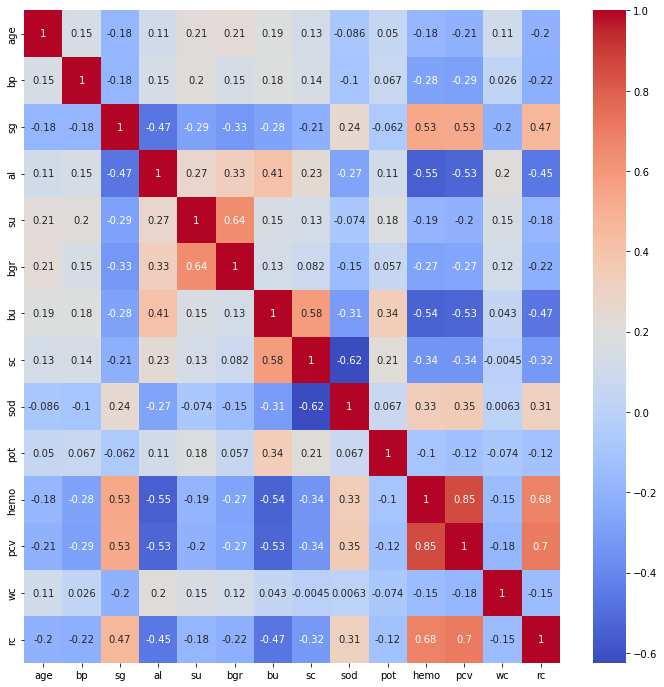

In [22]:
#Matrice corrélation de Pearson
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm');

Certaines corrélations apparaissent logiquement comme la corrélation positive entre l'hémoglobine (protéine présente dans les globules rouges) et le nombre de globules rouges.

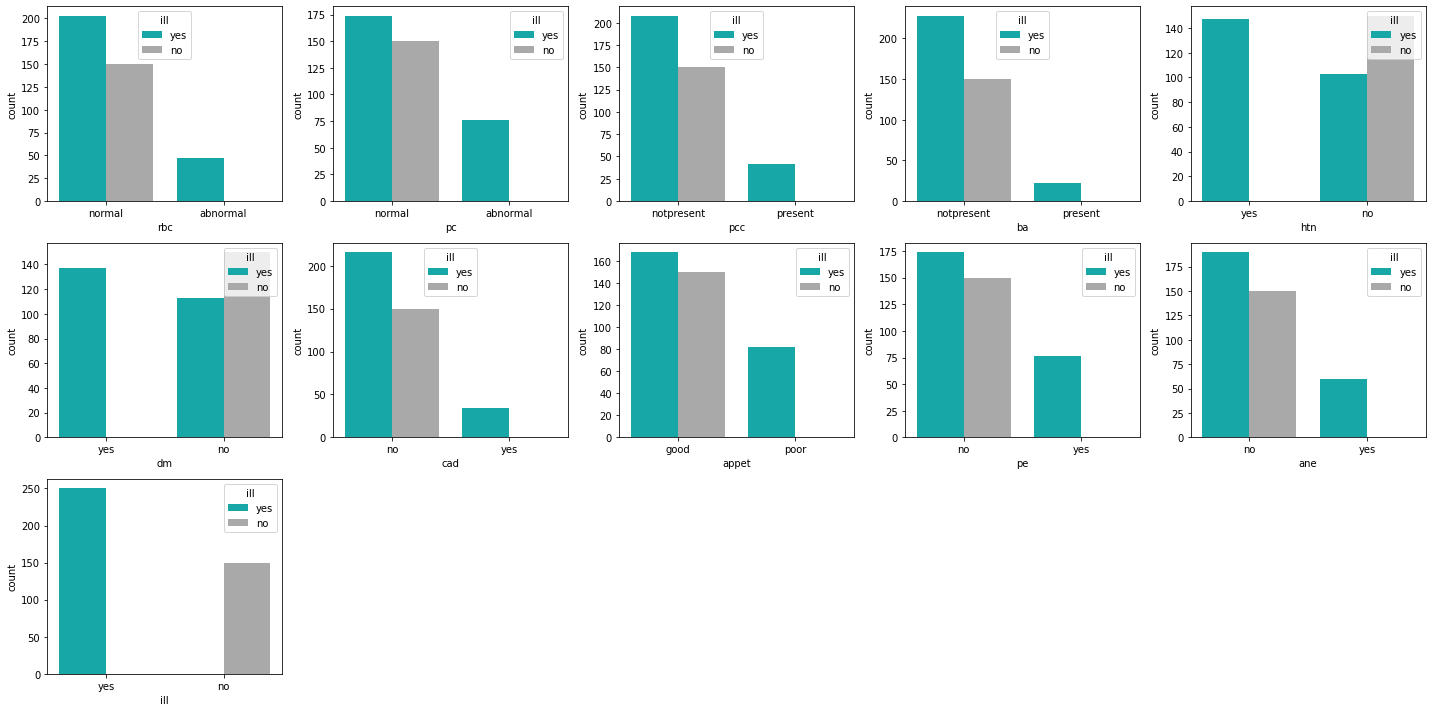

In [23]:
#Répartition des valeurs catéorielles du dataset en fonction de la variables cible "ill"
plt.figure(figsize = (20,10))
plot_number = 1

for column in cat_data:
    ax = plt.subplot(3, 5, plot_number)
    color = {'yes': 'c', 'no':'darkgray'}
    sns.countplot(x=column, hue='ill', palette = color, data = data)
    plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

In [24]:
#Test chi2 pour détecter quelles variables influent sur la probabilité que le patient soit atteint de la maladie
from scipy.stats import chi2_contingency

results = []

for col in cat_data:
    table = pd.crosstab(data[col], data['ill'])
    test = chi2_contingency(table)
    statistique = test[0]
    p_value = test[1]
    degre_liberte = test[2]
    results.append((col, statistique, p_value, degre_liberte))

df_chi2 = pd.DataFrame(results, columns=['col', 'statistique', 'p_value', 'degre_liberte'])
df_chi2

,col,statistique,p_value,degre_liberte
0,rbc,30.167360,3.963237e-08,1
1,pc,54.338315,1.687786e-13,1
2,pcc,26.397091,2.779587e-07,1
3,ba,12.326439,4.465875e-04,1
4,htn,136.928468,1.250081e-31,1
5,dm,122.597393,1.708208e-28,1
6,cad,20.580735,5.716852e-06,1
7,appet,59.890576,1.002805e-14,1
8,pe,54.338315,1.687786e-13,1
9,ane,40.491503,1.974729e-10,1


Toutes les variables qualitatives passent le test du khi2, ill et ses variables ne sont pas indépendantes.

#### Sans pour autant déterminer le diagnostique, présenter certaines caractéristiques augmente la probabilité que le patient soit atteint de la maladie rénale chronique :

    * Globules rouges anormaux 
    * Cellule de pus anormal
    * Amas de cellules de pus présent
    * Bactéries
    * Hypertension
    * Diabetes sucrés
    * Maladie Coronarienne
    * Faible appétit
    * Oedème de la pédale
    * Anémie

In [25]:
# Aggrégation pour voir le nombre de patients malades par cause probable de la maladie ((hypertension, diabetes mellitus, maladie coronarienne)
from scipy.stats import chi2_contingency
print(data.groupby(['htn', 'dm', 'cad'])['ill'].value_counts())

htn  dm   cad  ill
no   no   no   no     150
               yes     70
          yes  yes      2
     yes  no   yes     29
          yes  yes      2
yes  no   no   yes     35
          yes  yes      6
     yes  no   yes     82
          yes  yes     24
Name: ill, dtype: int64


Trop faibles sous-échantillons pour traiter les malades en fonction des causes supposées de la maladie.

### Pré-processing

In [26]:
#Conversion des variables catégorielles en variables indicatrices grâce à get_dummies
df = pd.get_dummies(data,columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])

In [27]:
# Séparation de la valeur cible et des valeurs explicatives
y = df['ill']
X = df.drop('ill',axis = 1)

In [28]:
#Séparation du jeu de données en jeu de test et d'entraînement
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [29]:
#Standardisation des variables numériques
num=['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
sc = StandardScaler()
X_train.loc[:,num] = sc.fit_transform(X_train[num])
X_test.loc[:,num] = sc.transform(X_test[num])

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from xgboost import plot_importance
import shap

### Modélisation

In [31]:
#Instanciation et entrainement SVC
svc = svm.SVC()
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_test)
print("La matrice de confusion du support vector machine est:\n", confusion_matrix(y_test,y_pred_svc))

La matrice de confusion du support vector machine est:
 [[35  0]
 [ 0 65]]


In [32]:
#Instanciation et entrainement Régression Logistique
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print("La matrice de confusion de la logistique regresssion est:\n", confusion_matrix(y_test,y_pred_LR))

La matrice de confusion de la logistique regresssion est:
 [[35  0]
 [ 1 64]]


In [33]:
# Instanciation et entrainement Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred_RF= RF.predict(X_test)

print("La matrice de confusion de la logistique regresssion est:\n", confusion_matrix(y_test,y_pred_RF))

La matrice de confusion de la logistique regresssion est:
 [[35  0]
 [ 0 65]]


La Random Forest obtient une accuracy de 100% sur le jeu de test.

### Interprétation

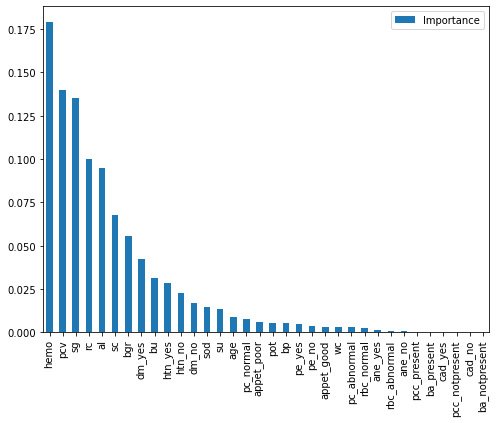

In [34]:
#Contribtion relative des variables explicatives en utilisant le modèle random forest
feat_importances_RF = pd.DataFrame(RF.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances_RF.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_RF.plot(kind='bar', figsize=(8,6))
plt.show()

In [35]:
### Random Forest SHAP

explainer = shap.Explainer(RF)

# Calcul des valeurs SHAP pour toutes les observations du jeu de test

shap_values = explainer.shap_values(X_test)

feature_names = X_test.columns.to_list()

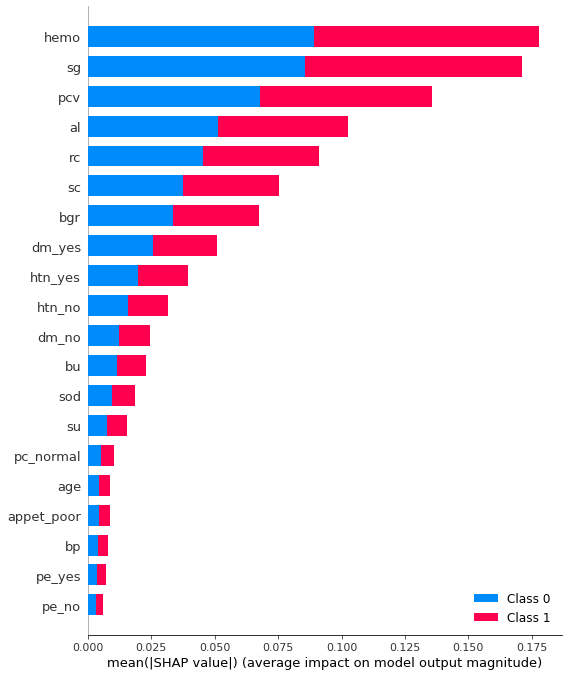

In [36]:
# Créez un graphique de résumé SHAP pour afficher les features importances
shap.summary_plot(shap_values,
                  feature_names=feature_names,
                 plot_type ='bar')

Globalement, les features importances et le SHAP sont en accord sur les variables qui influent le plus sur le modèle :
* l'hémoglobine
* la densité urinaire
* le volume d'hématocytes
* l'albumine
* le nombre de globules rouges

C'est la combiaison de ces variables qui doit alerter en premier lieu le corps médical.

### Visualiser graphiquement les patients

In [37]:
data.replace({'yes' : 1, 'no' :-1, 'good' : 1, 'poor' : -1, 'normal' : 1, 'abnormal': -1, 'present' : -1, 'notpresent' : 1 }, inplace = True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [38]:
# Séparation de la variable cible des variables explicatives
y = data['ill']
X = data.drop('ill', axis =1)

In [43]:
#Normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
norm = sc.fit_transform(X)

norm

array([[-0.20546364,  0.26233836,  0.48335471, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.62380991, -1.96658024,  0.48335471, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.62031314,  0.26233836, -1.38139079, ..., -1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.32888964,  0.26233836,  0.48335471, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.03396936, -1.22360737,  1.41572747, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.38437691,  0.26233836,  1.41572747, ...,  0.50780078,
        -0.4843221 , -0.42008403]])

In [44]:
#Création d'une instance PCA
model = PCA()

#Stockage de la représentation de data obtenue par ACP 
coord_acp = model.fit_transform(norm)

Les valeurs propres sont : [7.13782578 1.85812642 1.69013978 1.31297964 1.21827433 1.04717861
 1.0218285  1.00146426 0.89177446 0.80185538 0.78026929 0.70195197
 0.65220719 0.5995665  0.51278266 0.43953798 0.42399428 0.37210067
 0.35258181 0.3245461  0.28375281 0.27621603 0.22219909 0.13699686]


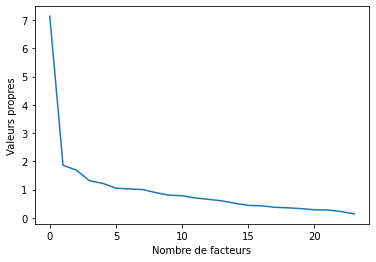

In [45]:
print('Les valeurs propres sont :', model.explained_variance_)

plt.plot(range(0,24), model.explained_variance_)
plt.xlabel('Nombre de facteurs')
plt.ylabel('Valeurs propres');

Les ratio sont : [0.29666588 0.07722838 0.07024643 0.05457072 0.05063453 0.04352336
 0.04246975 0.04162336 0.03706438 0.03332711 0.03242994 0.02917488
 0.02710736 0.02491948 0.02131253 0.0182683  0.01762226 0.01546543
 0.01465418 0.01348895 0.01179348 0.01148023 0.00923515 0.00569393]


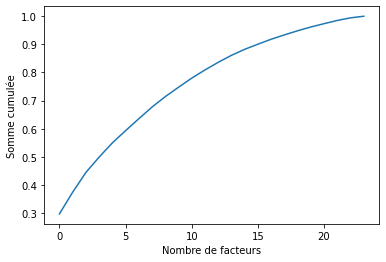

In [46]:
#Tracer le graphe de la somme cumulative représentant le ratio de la variance expliquée en fonction du nombre de composantes.
#Affichage du ratio de la variance expliquée pour chaque composante.
print('Les ratio sont :', model.explained_variance_ratio_)

plt.plot(np.arange(0,24), np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Nombre de facteurs')
plt.ylabel('Somme cumulée');

In [47]:
#Création d'un nouveau df avec les coordonnées des deux premières composantes de l'ACP et la variable cible 
acp_data = pd.DataFrame({'AXE 1': coord_acp[:,0], 'AXE 2' : coord_acp[:,1], 'ill' : y})

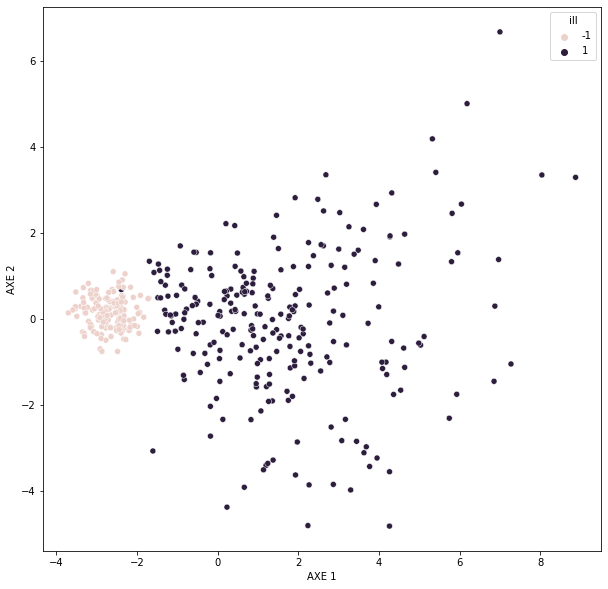

In [48]:
#Nuage de points AXE 1 et AXE 2, coloré en fonction de y
plt.figure(figsize=(10, 10))
sns.scatterplot(x='AXE 1', y='AXE 2', hue='ill', data = acp_data);

In [52]:
#Création d'une instance KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

#Ajustement du modèle aux données coord_acp
kmeans.fit(coord_acp)

#Récupération des prédictions 
y_kmeans = kmeans.predict(coord_acp)

#Stockage des coordonnées et des prédictions dans un nouveau df
coord_acp2 = pd.DataFrame(coord_acp)
coord_acp2['y_kmeans'] = y_kmeans

coord_acp2 

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,y_kmeans
0,-0.988954,-0.704590,0.844530,-0.337186,0.155170,-0.162249,-0.203663,-0.343530,0.095718,-0.314993,...,-0.670163,0.317794,0.413465,-0.561319,-0.761790,0.042820,0.070095,0.038182,-0.453967,1
1,-1.251970,1.018026,-1.244600,0.551911,0.154252,-0.466741,-0.764243,1.578999,-2.177012,1.386138,...,-0.267039,1.019728,-0.989351,0.791027,0.729534,-0.573813,-0.701671,0.379577,0.030703,1
2,2.813020,-2.515562,1.159347,-0.266576,-1.490309,-1.668514,0.368973,1.230336,-1.286021,-0.327732,...,0.399069,1.022136,0.096524,0.244486,0.894759,-0.951870,-0.294956,0.334802,-0.106513,0
3,4.270003,1.912897,-2.169958,-0.891981,1.302482,0.573764,0.530409,0.895335,-1.991493,-2.107256,...,0.779506,1.588892,0.136479,0.719456,-1.079878,-0.201778,0.185518,-0.929008,-0.240023,0
4,-0.496570,0.415304,-0.314234,-0.169971,-0.089247,-0.521229,0.661290,0.221272,0.011448,0.708038,...,0.175749,0.795305,-0.429743,0.438905,0.432105,-0.480453,-0.411261,0.044818,-0.098799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-2.446643,-0.241336,0.104191,0.275984,-0.707519,0.075695,0.090115,-0.864749,0.171557,-0.113686,...,-0.128076,-0.279033,-0.573871,-0.116346,-0.266840,-0.361014,0.426627,0.276975,-0.129813,1
396,-3.706748,0.140822,-0.116268,0.389856,0.431122,0.270021,-0.377744,-0.163840,0.195584,-0.510319,...,-0.371486,0.301116,0.234390,-0.231227,-0.393989,0.088990,-0.224619,-0.085761,0.188220,1
397,-3.003741,0.684074,-0.266535,0.589486,0.090820,-0.973990,-0.140843,0.350784,-0.235431,0.488448,...,-0.389775,0.099775,0.232205,-0.344548,-0.586290,0.016459,0.283913,-0.251886,-0.037420,1
398,-3.207961,0.829702,-0.126539,0.823479,0.327713,-0.015616,-0.609360,0.807260,-0.804098,0.219847,...,-0.424255,0.086367,0.362261,-0.413228,0.059758,0.293228,0.049831,-0.465460,0.544110,1


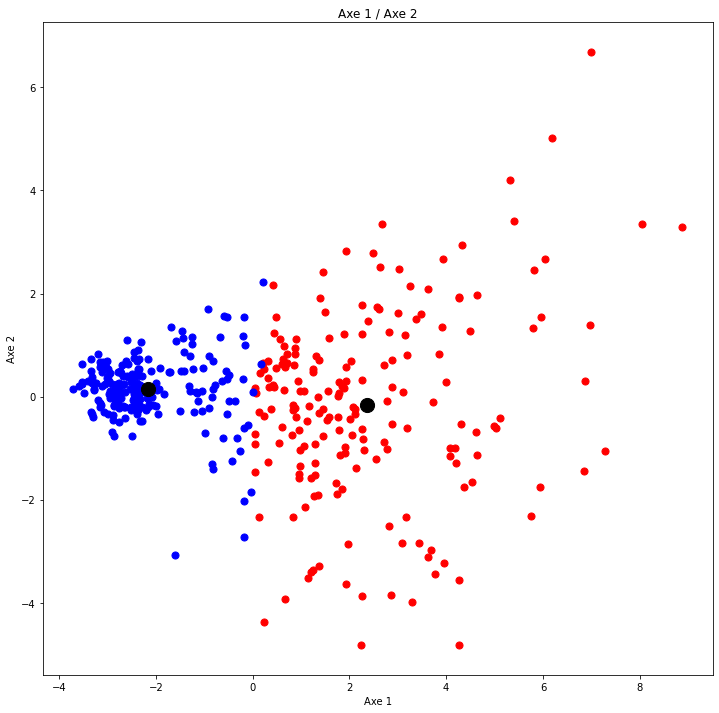

In [53]:
#Figure représentant les individus en fonction de son cluster 
plt.figure(figsize=(12, 12))

plt.scatter(coord_acp2[y_kmeans==0].iloc[:,0], coord_acp2[y_kmeans==0].iloc[:,1],
            s=50, c='red', label='Cluster 0')

plt.scatter(coord_acp2[y_kmeans==1].iloc[:,0], coord_acp2[y_kmeans==1].iloc[:,1],
            s=50, c='blue', label='Cluster 1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200)

plt.xlabel('Axe 1') 
plt.ylabel('Axe 2')
plt.title('Axe 1 / Axe 2');

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


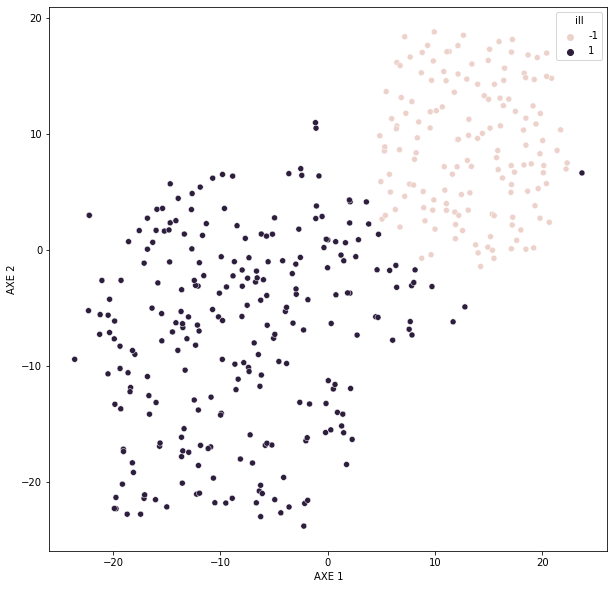

In [54]:
#Création d'une instance TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

#Application de TSNE aux données normées
TSNE_norm = tsne.fit_transform(norm)

#Stockage des 2 premières coordonnées de chaque point de la TSNE et de la variable cible
coord_TSNE = pd.DataFrame({'AXE 1': TSNE_norm[:, 0], 'AXE 2': TSNE_norm[:, 1], 'ill': y})

#Représentation des individus en fonction de la variable cible
plt.figure(figsize=(10, 10))
sns.scatterplot(x='AXE 1', y='AXE 2', hue='ill', data=coord_TSNE);

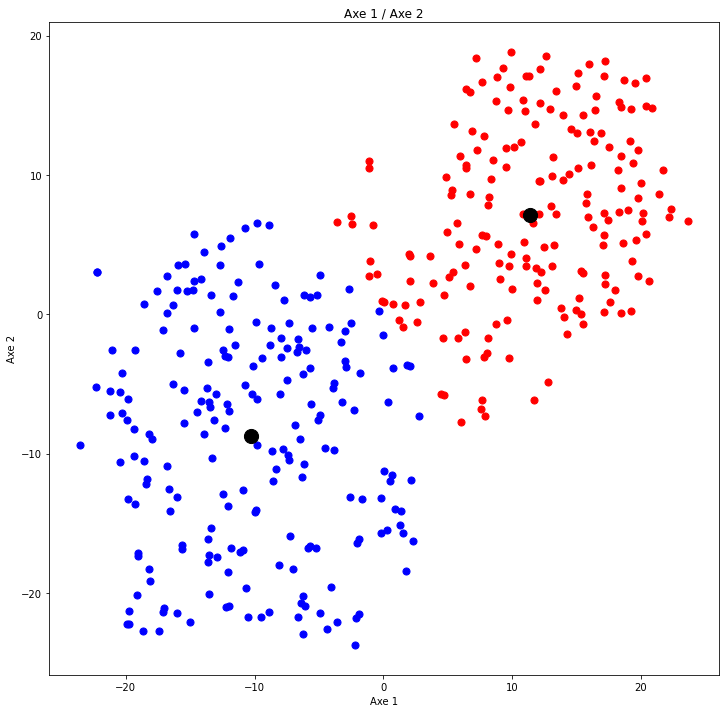

In [55]:
#Création d'une instance KMeans

kmeans2 = KMeans(n_clusters=2)

#Ajustement du modèle aux données coord_acp
kmeans2.fit(coord_TSNE)

#Récupération des prédictions 
y_kmeans2 = kmeans2.predict(coord_TSNE)

#Stockage des coordonnées et des prédictions dans un nouveau df
coord_acp3 = pd.DataFrame(coord_TSNE)
coord_acp3['y_kmeans2'] = y_kmeans2

#Figure représentant les individus en fonction de son cluster 
plt.figure(figsize=(12, 12))

plt.scatter(coord_acp3[y_kmeans2==0].iloc[:,0], coord_acp3[y_kmeans2==0].iloc[:,1],
            s=50, c='red', label='Cluster 0')

plt.scatter(coord_acp3[y_kmeans2==1].iloc[:,0], coord_acp3[y_kmeans2==1].iloc[:,1],
            s=50, c='blue', label='Cluster 1')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='black', s=200)

plt.xlabel('Axe 1') 
plt.ylabel('Axe 2')
plt.title('Axe 1 / Axe 2');

In [56]:
print('Nombre de patients cluster 0 :', len(coord_acp2[coord_acp3.y_kmeans2 == 0]))
print('Nombre de patients cluster 1 :', len(coord_acp2[coord_acp3.y_kmeans2 == 1]))

Nombre de patients cluster 0 : 190
Nombre de patients cluster 1 : 210


La combinaison de l'ACP, le KMeans et la TSNE permet de séparer clairement graphiquement les deux groupes de patients.
En revanche, la répartition des patients est moins performante qu'avec des algorithmes comme la Random Forest dans ce cas.

### Conclusion :
Nous avons créé un algorithme capable de diagnostiquer la maladie rénale chronique suite à un bilan sanguin et urinaire. Les analyses exploratoires et la compréhension de cet algorythme nous permet d'identifier les caractéristiques les plus importantes pour détecter une maladie rénale chronique :

* hémoglobine ( hemo <= 12.5)
* densité urinaire ( sg < 10.20 )
* volume d'hématocytes ( pcv < 40 )
* albumine ( al > 0 )
* nombre de globules rouges ( rc < 4.8 )

Il faut cependant conserver un certain recul sur ces réslutats qui proviennent d'un dataset trop petit pour pouvoir être réellement exploitables.